# *Fake News Classification*

### *Import necessary libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### *Download NLTK resources*

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Patrice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Patrice\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### *Load Dataset*

In [3]:
df = pd.read_csv('train.csv')

## *Looking through the Dataset*

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


### *Fill missing values with empty strings*

In [7]:
df.fillna(' ', inplace=True)

### *Combine into a new column called 'content'*

In [8]:
df['content'] = df['author'] + ' ' + df['title']

### *Initialize lemmatizer*

In [9]:
lemmatizer = WordNetLemmatizer()

### *Define preprocessing function*

In [10]:
def preprocess(text):
    # Remove special characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize
    words = text.split()
    # Lemmatize and remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    # Join words back into a single string
    return ' '.join(words)


### *Apply preprocessing to the 'content' column*

In [11]:
df['content'] = df['content'].apply(preprocess)

### *Display the first few rows of the dataset after preprocessing*

In [12]:
print("First 5 rows of preprocessed data:")
df.head()

First 5 rows of preprocessed data:


,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide even see comey le...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,daniel j flynn flynn hillary clinton big woman...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews com truth might get fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss civilian killed single u airst...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed fictional ...


### *Feature extraction using TF-IDF*

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(df['content'].values)
y = df['label'].values

### *Split the dataset into training and testing sets*

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### *Train a Logistic Regression model*

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### *Evaluate the model*

In [16]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9905
Testing Accuracy: 0.9702


### *Display a classification report*

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2077
           1       0.95      0.99      0.97      2083

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



### *Confusion Matrix Visualization*

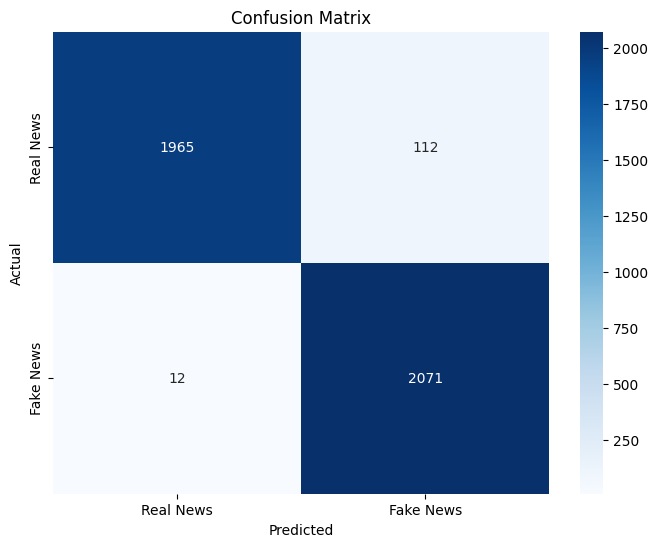

In [18]:
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real News', 'Fake News'], yticklabels=['Real News', 'Fake News'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### *Visualization: Accuracy comparison for Training and Testing*

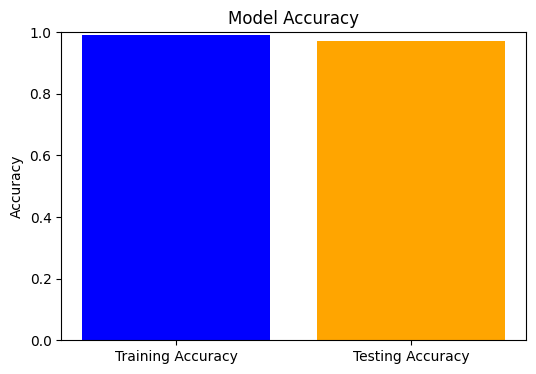

In [19]:
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()

### *Prediction on a new input*

In [20]:
def predict_news(input_text):
    # Preprocess the input text
    processed_text = preprocess(input_text)
    # Transform the text using the TF-IDF vectorizer
    transformed_text = vectorizer.transform([processed_text])
    # Predict the label (0 for Real, 1 for Fake) and probability
    prediction = model.predict(transformed_text)[0]
    probabilities = model.predict_proba(transformed_text)[0]
    return prediction, probabilities

### *Example usage of the prediction function*

In [21]:
# Example usage of the prediction function with test data
input_data = X_test[9]#Select the 10th sample from the test dataset
prediction = model.predict(input_data)

# Print the prediction result 
print("\nPrediction Result:")

if prediction[0] == 0:
    print('The News Is Real')
else:
    print('The News Is Fake')



Prediction Result:
The News Is Real


### *The Example*

In [22]:
df['content'][10]

'aaron klein obama organizing action partner soros linked indivisible disrupt trump agenda'